<a href="https://colab.research.google.com/github/merine-j/machinelearning_projects/blob/master/titanic_survival_MLproj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# **Data loading and EDA**

In [ ]:
dft=pd.read_csv('/content/drive/MyDrive/data set/titanic.csv')
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_org1=dft.copy(deep=True)

In [ ]:
dft.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dft.shape

(891, 12)

In [ ]:
dft.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dft.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df=dft.iloc[:,[1,2,3,4,5,6,7,0]]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [ ]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [ ]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,24.0,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


# **data visualization**





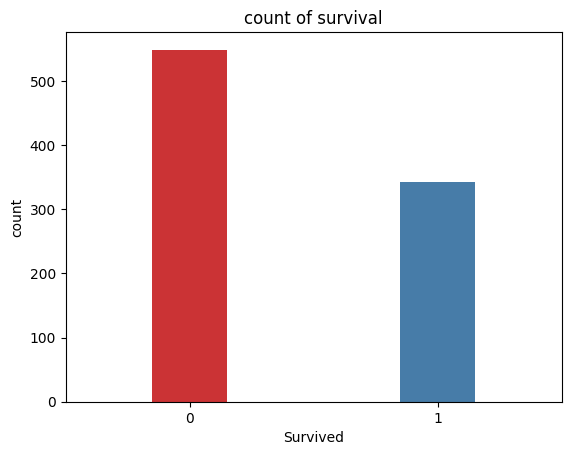

In [ ]:
sns.countplot(x='Survived',data=df,width=0.3,palette='Set1')
plt.title('count of survival')
plt.show()

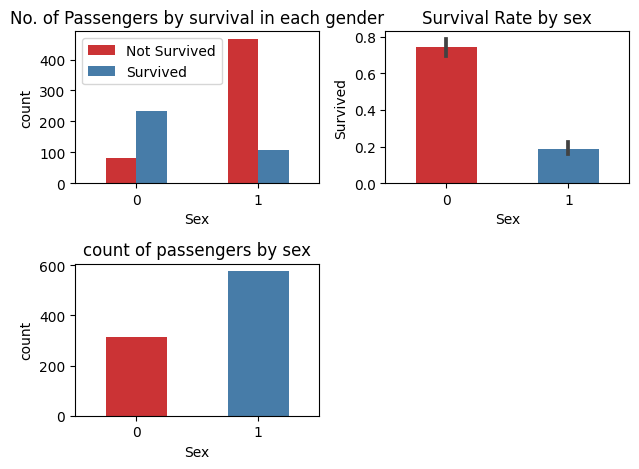

In [ ]:
plt.subplot(2,2,1)
sns.countplot(x='Sex',hue='Survived',data=df,width=0.5,palette='Set1')
plt.title('No. of Passengers by survival in each gender')
plt.legend(['Not Survived', 'Survived'])
plt.subplot(2,2,2)
sns.barplot(x='Sex',y='Survived',data=df,width=0.5,palette='Set1')
plt.title('Survival Rate by sex')
plt.subplot(2,2,3)
sns.countplot(x='Sex',data=df,width=0.5,palette='Set1')
plt.title('count of passengers by sex')
plt.tight_layout()
plt.show()
#females have a much higher chance of survival than males.

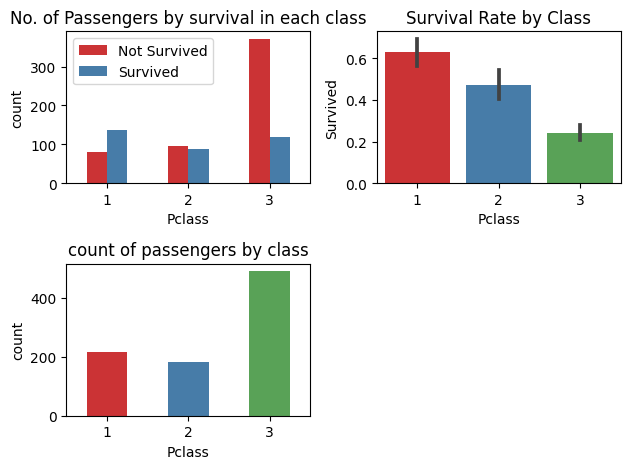

In [ ]:
plt.subplot(2,2,1)
sns.countplot(x='Pclass',hue='Survived',data=df,width=0.5,palette='Set1')
plt.title('No. of Passengers by survival in each class')
plt.legend(['Not Survived', 'Survived'])
plt.subplot(2,2,2)
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Class')
plt.subplot(2,2,3)
sns.countplot(x='Pclass',data=df,width=0.5,palette='Set1')
plt.title('count of passengers by class')
plt.tight_layout()
plt.show()                                                      #people in higher socio economic class/1st class have higher chance of survival

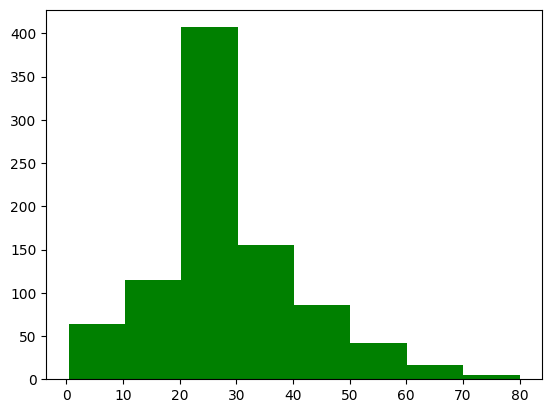

In [ ]:
plt.hist(df['Age'],bins=8,color='green')
plt.show()

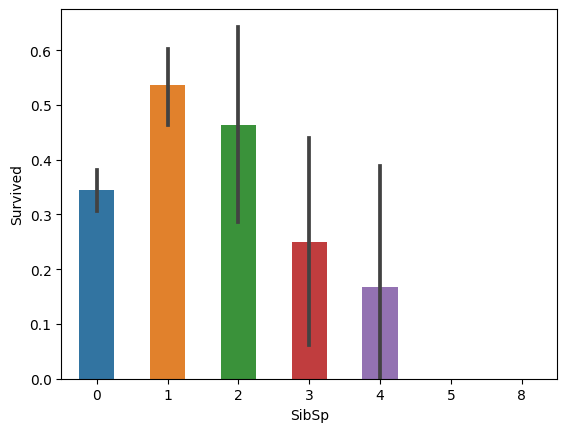

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=df,width=0.5)
plt.show()
#people with more sibling or spouses are less likely to survive than people with one or two relatives

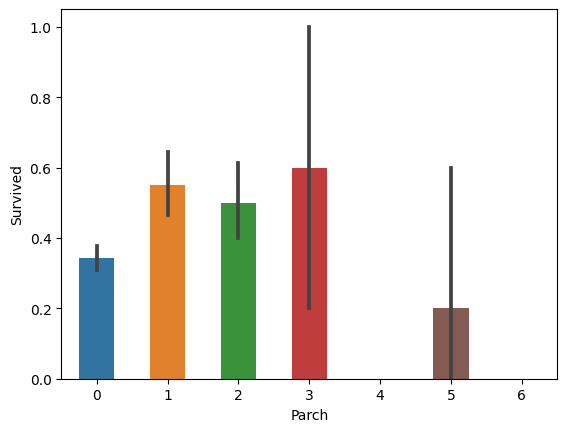

In [ ]:
sns.barplot(x='Parch',y='Survived',data=df,width=0.5)
plt.show()
#People with less than 4 parents or children are more likely to survive than those with four or more.
#people traveling alone are less likely to survive than those with 1-3 parents or children.

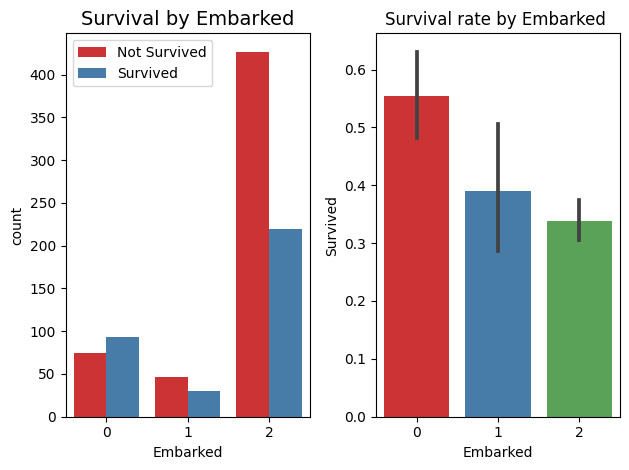

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Embarked', fontsize=14)
plt.legend(['Not Survived', 'Survived'])
plt.subplot(1,2,2)
sns.barplot(x='Embarked', y='Survived', data=df, palette='Set1');
plt.title("Survival rate by Embarked ")
plt.tight_layout()
plt.show()

**scaling and splitting**

In [ ]:
X=df.iloc[:,:-1]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,24.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
y=df.iloc[:,-1]

In [ ]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

**Model creation and prediction**

[0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 0]
80.224
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       167
           1       0.77      0.67      0.72       101

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

[0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1

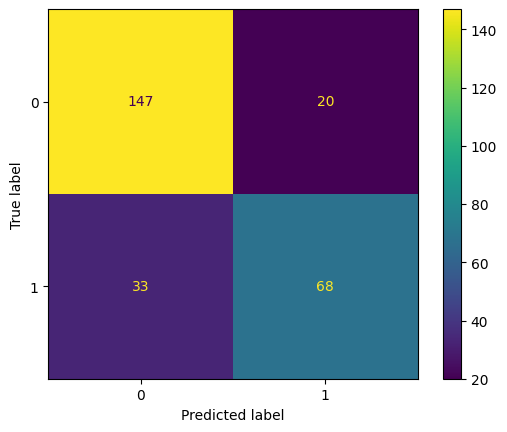

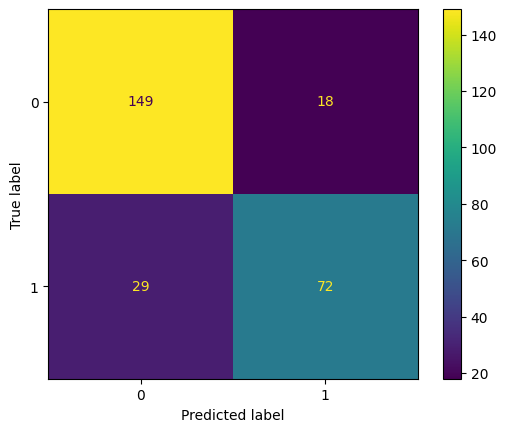

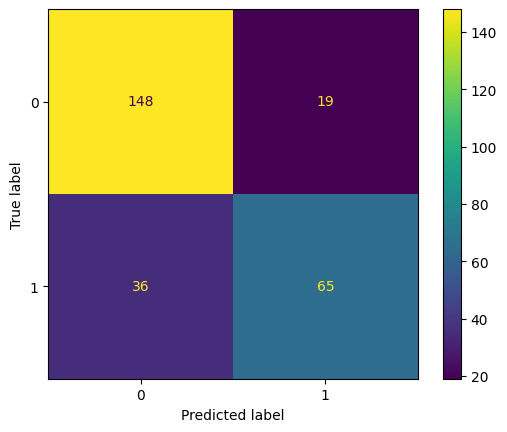

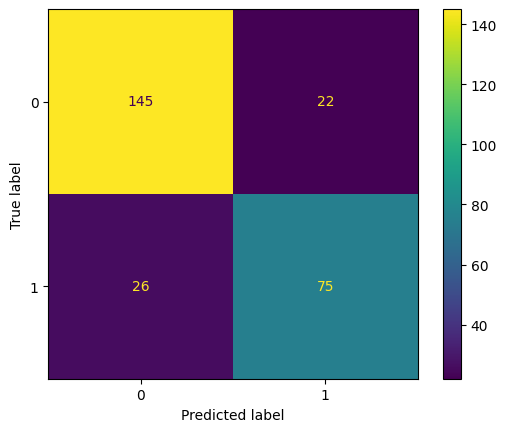

In [ ]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',random_state=16)
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
sv=SVC(kernel='linear',random_state=3)
dt=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=77)
mdl=[rf,knn,sv,dt]
for i in mdl:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(y_pred)
  print(round(accuracy_score(y_test,y_pred)*100,3))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**after over sampling**

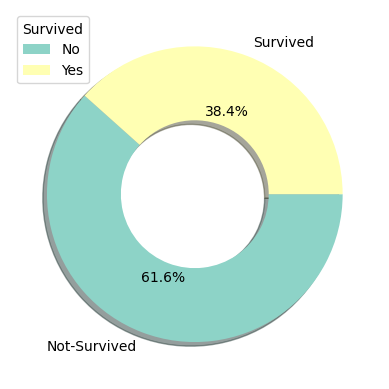

In [ ]:
colors = sns.color_palette(palette='Set3')
plt.pie(y.value_counts(),labels=['Not-Survived','Survived'],counterclock=False,shadow=True,autopct='%1.1f%%',colors=colors,wedgeprops= dict(width=0.5))
plt.legend(title='Survived', labels=['No', 'Yes'],loc='upper left')
plt.show()

In [ ]:
os=SMOTE(random_state=5)
X_os,y_os=os.fit_resample(X,y)

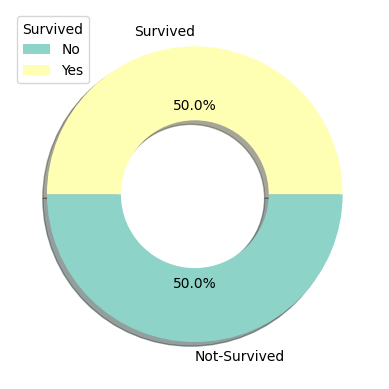

In [ ]:
plt.pie(y_os.value_counts(),labels=['Not-Survived','Survived'],counterclock=False,shadow=True,autopct='%1.1f%%',colors=colors,wedgeprops= dict(width=0.5))
plt.legend(title='Survived', labels=['No', 'Yes'],loc='upper left')
plt.show()

In [ ]:
X_trainos,X_testos,y_trainos,y_testos=train_test_split(X_os,y_os,test_size=0.3,random_state=10)

[1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
82.424
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       155
           1       0.84      0.82      0.83       175

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       3

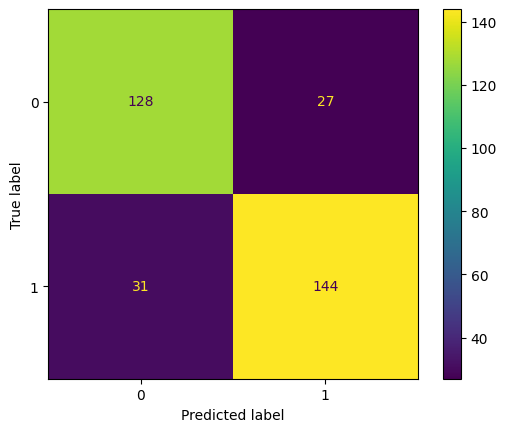

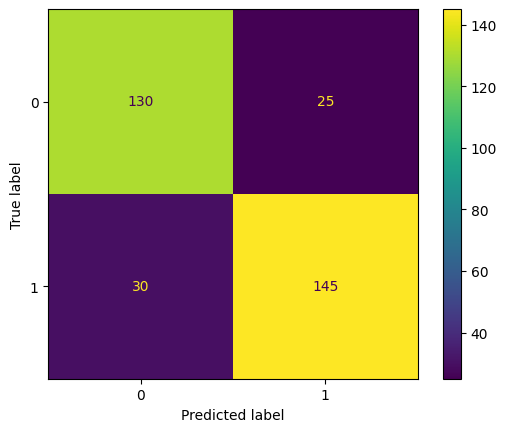

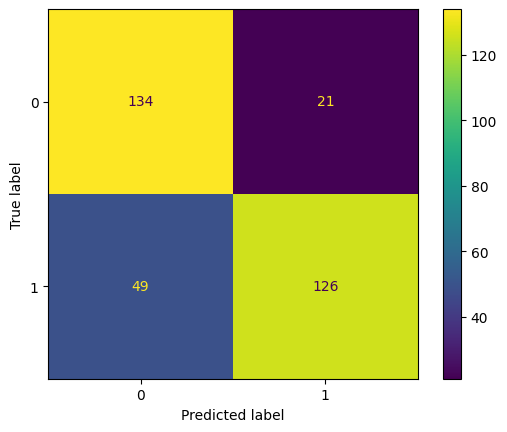

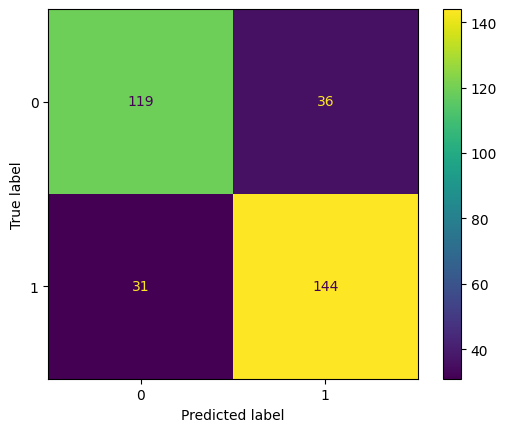

In [ ]:
for i in mdl:
  i.fit(X_trainos,y_trainos)
  y_pred=i.predict(X_testos)
  print(y_pred)
  print(round(accuracy_score(y_testos,y_pred)*100,3))
  print(classification_report(y_testos,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_testos,y_pred))

**PCA**

<Axes: >

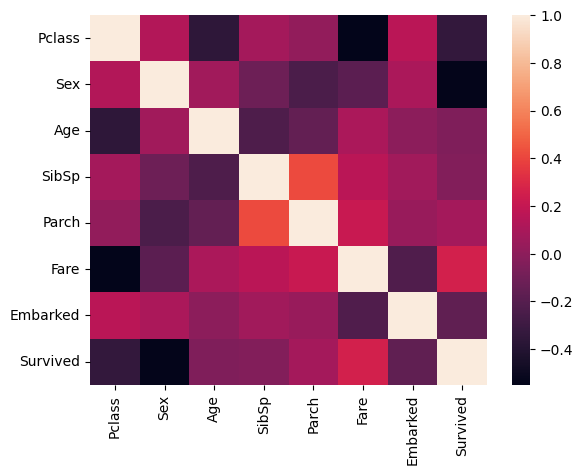

In [ ]:
sns.heatmap(df.corr())

In [ ]:
pc=PCA(n_components=6)
X_trainp=pc.fit_transform(X_train)
X_testp=pc.transform(X_test)

In [ ]:
pc.explained_variance_ratio_

array([0.26174803, 0.25022999, 0.15405684, 0.11750416, 0.09925899,
       0.07945325])

[0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 0 1]
81.343
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.76      0.73      0.75       101

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

[0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1

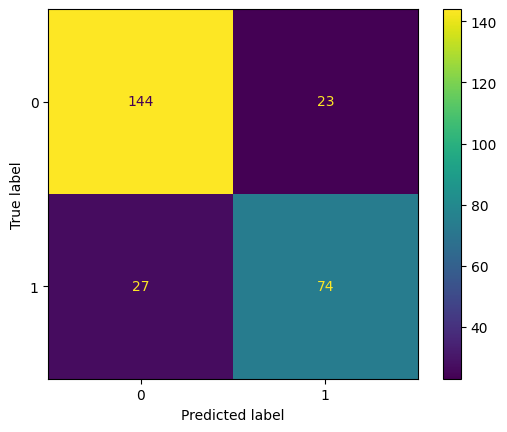

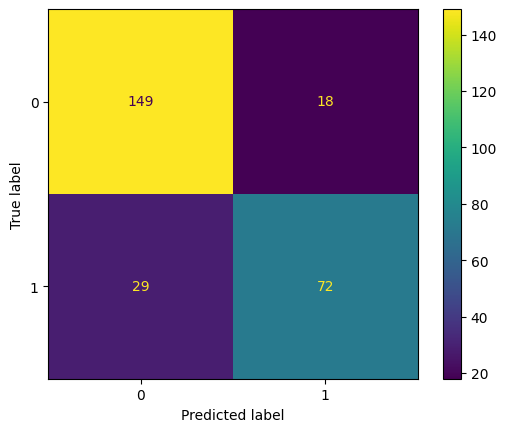

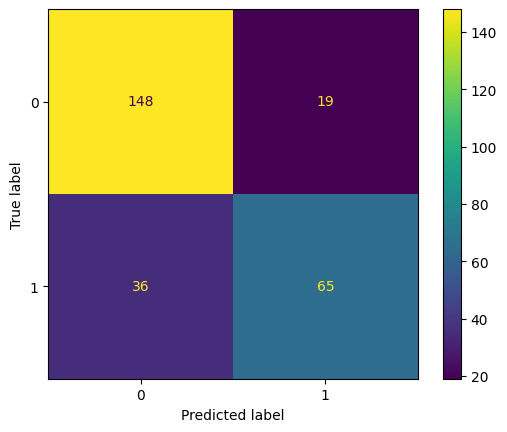

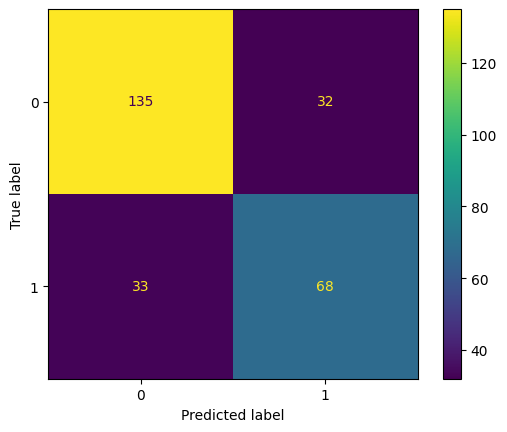

In [ ]:
for i in mdl:
  i.fit(X_trainp,y_train)
  y_pred=i.predict(X_testp)
  print(y_pred)
  print(round(accuracy_score(y_test,y_pred)*100,3))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**conclusion**

In [ ]:
dff=pd.DataFrame({'model':['random forest','knn','svc','decision tree'],'Accuracy':[83.209,83.582,79.478,82.09],'acc_over sampling':[83.333,85.455,78.788,76.667],'acc_PCA':[80.597,83.582,79.478,78.731]})
dff.style.highlight_max(color='green',axis=0,subset=['Accuracy','acc_over sampling','acc_PCA'])

,model,Accuracy,acc_over sampling,acc_PCA
0,random forest,83.209000,83.333000,80.597000
1,knn,83.582000,85.455000,83.582000
2,svc,79.478000,78.788000,79.478000
3,decision tree,82.090000,76.667000,78.731000


<Figure size 1000x1000 with 0 Axes>

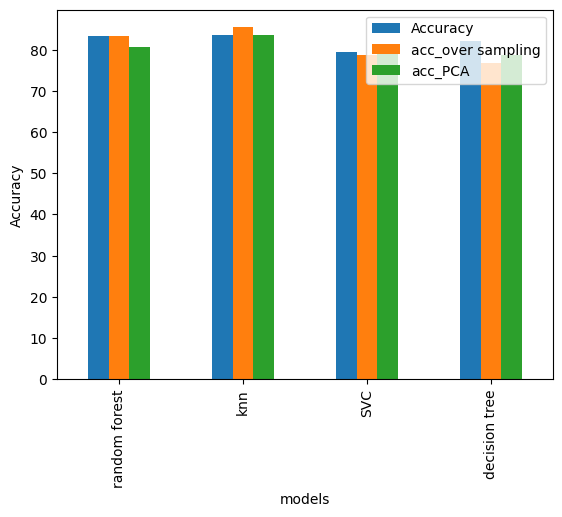

<Figure size 1000x1000 with 0 Axes>

In [ ]:
dff=pd.DataFrame({'model':['random forest','knn','svc','decision tree'],'Accuracy':[83.209,83.582,79.478,82.09],'acc_over sampling':[83.333,85.455,78.788,76.667],'acc_PCA':[80.597,83.582,79.478,78.731]},index=['random forest','knn','SVC','decision tree'])
dff.plot(kind='bar')
plt.xlabel('models')
plt.ylabel('Accuracy')
sns.set_style('dark')
plt.figure(figsize=(10,10))